# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [ahmad ghyfari savero]
- **Email:** [ahmad.vero28@gmail.com]
- **ID Dicoding:** [ahmad ghyfari savero]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan hari libur dengan banyaknya customer penyewa sepeda?
- Bagaimana perbedaan hari mempengaruhi banyaknya customer penyewa sepeda?
- bagaimana pengaruh musim dan cuaca terhadap temperatur, kecepatan angin dan kelembapan?
- Bagaimana perbedaan musim mepengaruhi banyaknya customer penyewa sepeda?
- Apakah penjualan setiap harinya semakin bertambah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#membaca data day.csv
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#membaca data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
#menilai data pada day.csv

# tipe data dari tiap colomb
day_df.info()

#jumlah missing value
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

#menghitung data yang berbeda
day_df.nunique()

#parameter statistik
day_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#menilai data pada hour.csv

# tipe data dari tiap colomb
hour_df.info()

#jumlah missing value
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

#menghitung data yang berbeda
hour_df.nunique()

#parameter statistik
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data


Cleaning data day_df


In [6]:
#membersihkan duplikasi
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())

#memastikan kembali valuenya benar
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


cleaning data hour_df


In [7]:

#membersihkan duplikasi
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

#memastikan kembali valuenya benar
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


mengubah value agar lebih mudah dikenali

In [8]:
#menyatukan value pada tanggal yang sama
day_df['dteday'] = pd.to_datetime(day_df["dteday"])
hour_df['dteday'] = pd.to_datetime(hour_df["dteday"])

# #season
day_df['season'] = day_df['season'].astype('category')
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['season'] = hour_df['season'].astype('category')
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#hari
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['weekday'] = day_df['weekday'].cat.rename_categories({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

#holiday
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['holiday'] = day_df['holiday'].cat.rename_categories({0: 'work', 1: 'holiday'})
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['holiday'] = hour_df['holiday'].cat.rename_categories({0: 'work', 1: 'holiday'})

#weather
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1: 'clear', 2: 'cloudy', 3: 'ltlrn', 4: 'hvyrn'})
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1: 'clear', 2: 'cloudy', 3: 'ltlrn', 4: 'hvyrn'})


## Exploratory Data Analysis (EDA)

### Explore ...

pengaruh hari libur terhadap banyak customer


In [9]:
print("pada saat tidak libur atau hari kerja, penyewa sepeda cenderung lebih banyak")
day_df.groupby(by="holiday").agg({
    "cnt": ["sum", "mean", "max", "min" ],
    "registered": ["sum", "mean", "max", "min" ],
    "casual": ["sum", "mean", "max", "min" ]
})


pada saat tidak libur atau hari kerja, penyewa sepeda cenderung lebih banyak


C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\1697239848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="holiday").agg({


cnt                          registered                          \
             sum         mean   max   min        sum         mean   max  min   
holiday                                                                        
work     3214244  4527.104225  8714    22    2616586  3685.332394  6946   20   
holiday    78435  3735.000000  7403  1000      56076  2670.285714  5172  573   

         casual                          
            sum         mean   max  min  
holiday                                  
work     597658   841.771831  3410    2  
holiday   22359  1064.714286  3065  117

pengaruh perbedaan hari pada banyaknya customer


In [10]:
print("pada weekday, penyewa sepeda cenderung lebih banyak dari pada ketika weekend")
day_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean", "max", "min" ],
    "registered": ["sum", "mean", "max", "min" ],
    "casual": ["sum", "mean", "max", "min" ]
})

pada weekday, penyewa sepeda cenderung lebih banyak dari pada ketika weekend


C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\2223411376.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="weekday").agg({


cnt                          registered                     \
              sum         mean   max   min        sum         mean   max   
weekday                                                                    
sunday     444027  4228.828571  8227   605     303506  2890.533333  5657   
monday     455503  4338.123810  7525    22     384719  3663.990476  6435   
tuesday    469109  4510.663462  7767   683     411266  3954.480769  6697   
wednesday  473048  4548.538462  8173   441     415729  3997.394231  6946   
thursday   485395  4667.259615  7804   431     423935  4076.298077  6781   
friday     487790  4690.288462  8362  1167     409552  3938.000000  6917   
saturday   477807  4550.542857  8714   627     323955  3085.285714  5966   

                 casual                         
            min     sum         mean   max min  
weekday                                         
sunday      451  140521  1338.295238  3283  54  
monday       20   70784   674.133333  3065   2  
tuesday     573   57843   556.182692  1348   9  
wednesday   432   57319   551.144231  2562   9  
thursday    416   61460   590.961538  1405  15  
friday     1129   78238   752.288462  2469  38  
saturday    570  153852  1465.257143  3410  57

pengaruh season dan cuaca terhadap rata rata temperatur, kelembapan, dan kecepatan angin

In [11]:
day_df.groupby(by=["season", "weathersit"]).agg({
    'temp' : "mean",
    'windspeed': 'mean'
    
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\1216823550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["season", "weathersit"]).agg({


temp  windspeed
season weathersit                     
Spring clear       0.301221   0.225780
       cloudy      0.293678   0.191023
       ltlrn       0.268523   0.290517
Summer clear       0.563402   0.202740
       cloudy      0.520739   0.200482
       ltlrn       0.365278   0.301000
Fall   clear       0.720862   0.170204
       cloudy      0.674583   0.174148
       ltlrn       0.592228   0.211753
Winter clear       0.404918   0.164738
       cloudy      0.446267   0.176139
       ltlrn       0.456341   0.219797

In [12]:
print("pada musim gugur, penyewa sepeda cenderung lebih banyak, diikuti dengan musim panas")
day_df.groupby(by='season').agg({
    "cnt": ["sum", "mean", "max", "min" ],
    "registered": ["sum", "mean", "max", "min" ],
    "casual": ["sum", "mean", "max", "min" ]
})

pada musim gugur, penyewa sepeda cenderung lebih banyak, diikuti dengan musim panas


C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\3086094598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


cnt                          registered                          \
            sum         mean   max   min        sum         mean   max  min   
season                                                                        
Spring   471348  2604.132597  7836   431     410726  2269.204420  5315  416   
Summer   918589  4992.331522  8362   795     715067  3886.233696  6456  674   
Fall    1061129  5644.303191  8714  1115     835038  4441.691489  6917  889   
Winter   841613  4728.162921  8555    22     711831  3999.050562  6946   20   

        casual                          
           sum         mean   max  min  
season                                  
Spring   60622   334.928177  3155    9  
Summer  203522  1106.097826  3410  120  
Fall    226091  1202.611702  3160  118  
Winter  129782   729.112360  3031    2

## Visualization & Explanatory Analysis

### Pertanyaan 1: pengaruh hari libur terhadap banyaknya customer

C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\2584854740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_day_df = day_df.groupby(['holiday'],as_index=False).cnt.sum()


,holiday,cnt
0,work,3214244
1,holiday,78435


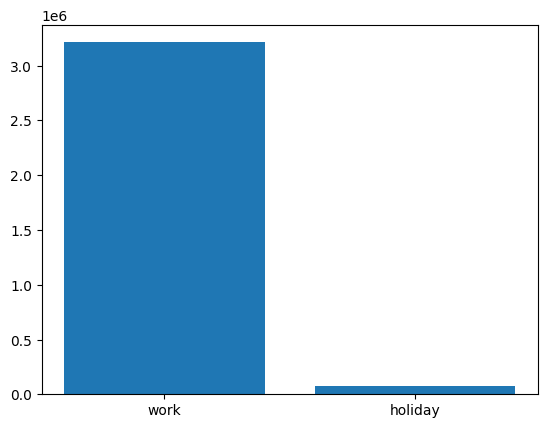

In [13]:
x_day_df = day_df.groupby(['holiday'],as_index=False).cnt.sum()
plt.bar(x= x_day_df['holiday'], height=x_day_df['cnt'],)

x_day_df


<function matplotlib.pyplot.show(close=None, block=None)>

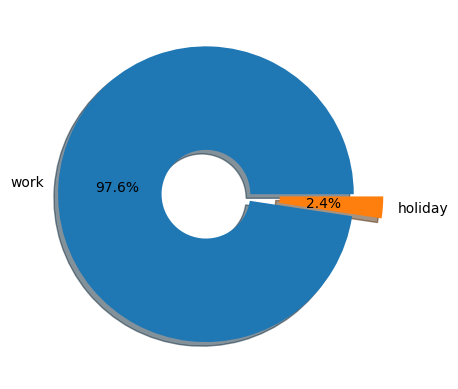

In [14]:
plt.pie(
    x= x_day_df['cnt'],
    labels= x_day_df['holiday'],
    autopct='%1.1f%%',
    wedgeprops = {'width': 0.7},
    explode= (0, 0.2),
    shadow=True
)
plt.show

### Pertanyaan 2: pengaruh hari terhadap rata rata jumlah customer

C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\3257148041.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hari_day_mean = day_df.groupby(['weekday'], as_index=False).cnt.mean()


Text(0.5, 0, 'amount(milions)')

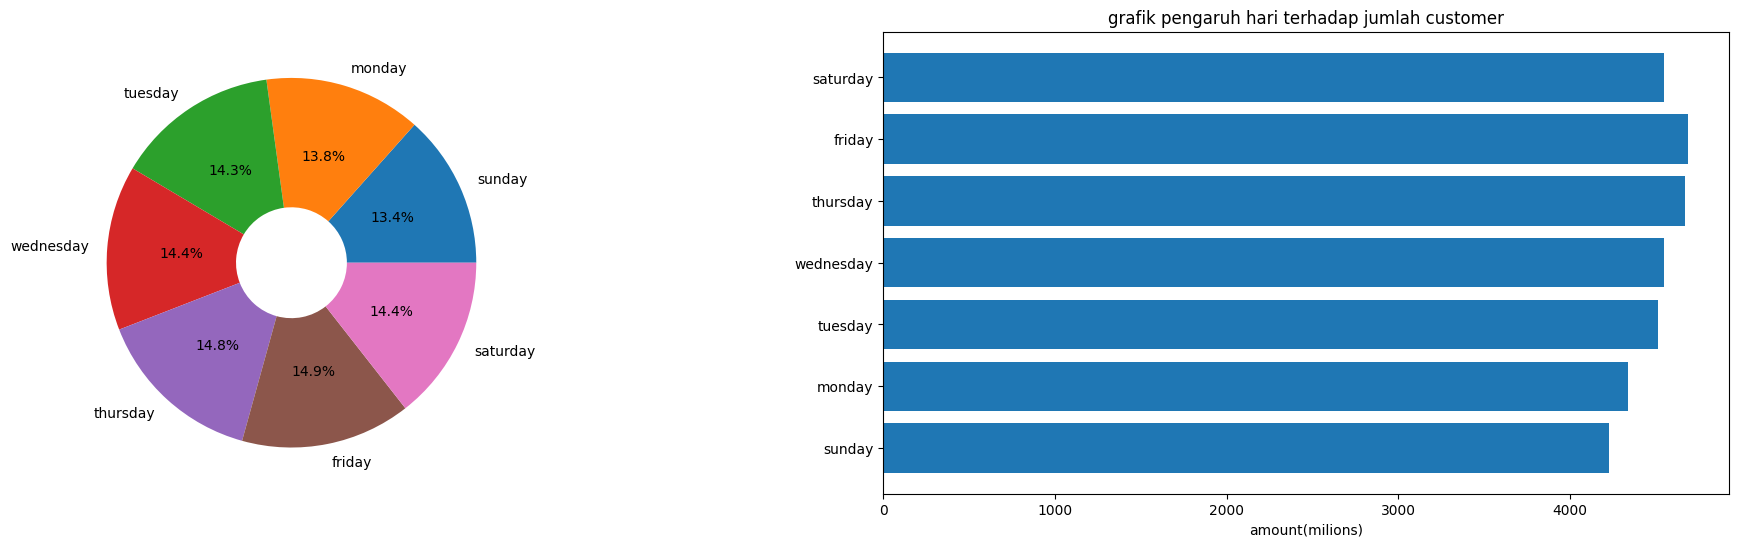

In [15]:
hari_day_mean = day_df.groupby(['weekday'], as_index=False).cnt.mean()
hari_day= hari_day_mean['cnt'].map(int)
fig, axs =plt.subplots(1, 2, figsize=(24,6))

plt.title('grafik pengaruh hari terhadap jumlah customer')
axs[0].pie(x=hari_day, labels=hari_day_mean['weekday'], autopct='%1.1f%%', wedgeprops = {'width': 0.7},)
axs[1].barh(hari_day_mean['weekday'], hari_day_mean['cnt'])
axs[1].set_xlabel('amount(milions)')

### Pertanyaan 3: pengaruh musim dan cuaca terhadap temperatur, kecepatan angin

C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\3708386090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df = day_df.groupby(["season", "weathersit"], as_index=False).agg({


,season,weathersit,temp,windspeed
0,Spring,clear,0.301221,0.225780
1,Spring,cloudy,0.293678,0.191023
2,Spring,ltlrn,0.268523,0.290517
3,Summer,clear,0.563402,0.202740
4,Summer,cloudy,0.520739,0.200482
5,Summer,ltlrn,0.365278,0.301000
6,Fall,clear,0.720862,0.170204
7,Fall,cloudy,0.674583,0.174148
8,Fall,ltlrn,0.592228,0.211753
9,Winter,clear,0.404918,0.164738


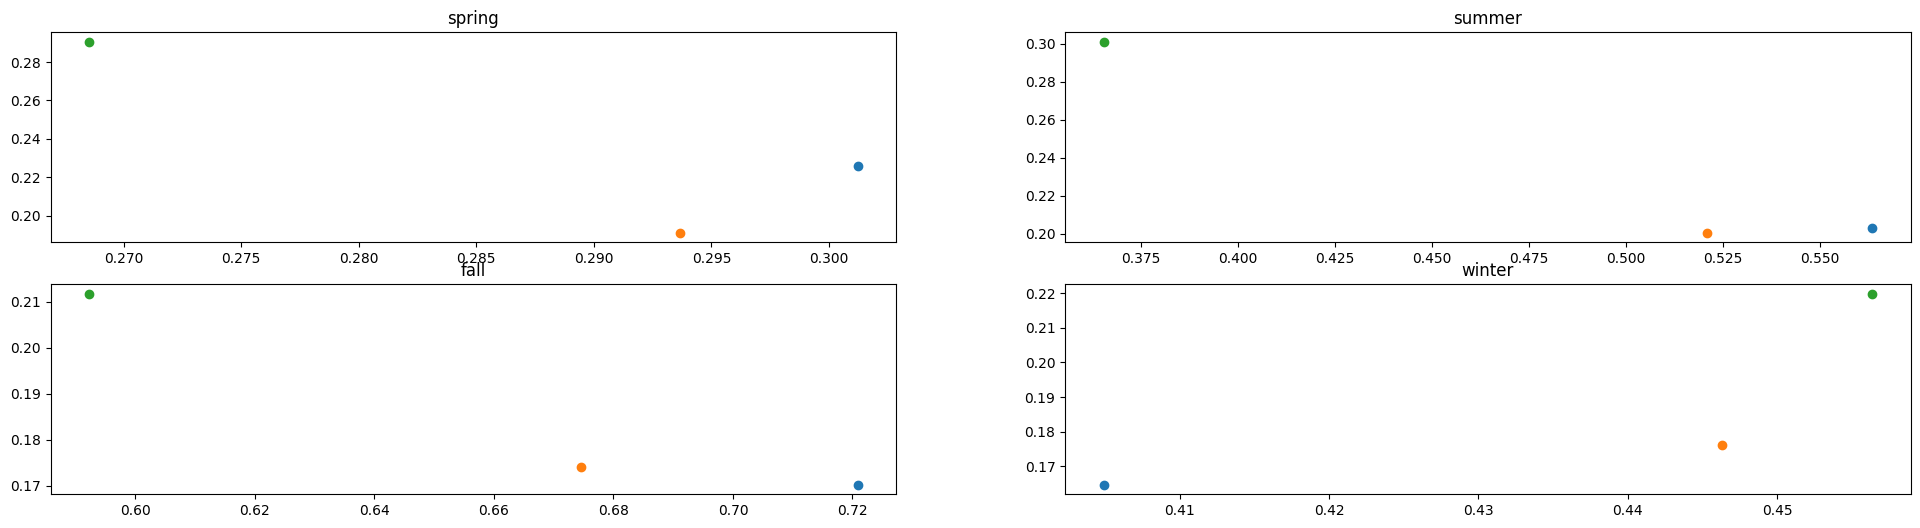

In [16]:
season_df = day_df.groupby(["season", "weathersit"], as_index=False).agg({
    'temp' : "mean",
    'windspeed': 'mean' 
})
fig, axs =plt.subplots(2, 2, figsize=(24,6))
axs[0,0].scatter(season_df.at[0,'temp'], season_df.at[0,'windspeed'], label = 'clear')
axs[0,0].scatter(season_df.at[1,'temp'], season_df.at[1,'windspeed'], label = 'cloudy')
axs[0,0].scatter(season_df.at[2,'temp'], season_df.at[2,'windspeed'], label = 'little rain')
axs[0,0].set_title("spring")

axs[0,1].scatter(season_df.at[3,'temp'], season_df.at[3,'windspeed'], label = 'clear')
axs[0,1].scatter(season_df.at[4,'temp'], season_df.at[4,'windspeed'], label = 'cloudy')
axs[0,1].scatter(season_df.at[5,'temp'], season_df.at[5,'windspeed'], label = 'little rain')
axs[0,1].set_title("summer")

axs[1,0].scatter(season_df.at[6,'temp'], season_df.at[6,'windspeed'], label = 'clear')
axs[1,0].scatter(season_df.at[7,'temp'], season_df.at[7,'windspeed'], label = 'cloudy')
axs[1,0].scatter(season_df.at[8,'temp'], season_df.at[8,'windspeed'], label = 'little rain')
axs[1,0].set_title("fall")

axs[1,1].scatter(season_df.at[9,'temp'], season_df.at[9,'windspeed'], label = 'clear')
axs[1,1].scatter(season_df.at[10,'temp'], season_df.at[10,'windspeed'], label = 'cloudy')
axs[1,1].scatter(season_df.at[11,'temp'], season_df.at[11,'windspeed'], label = 'little rain')
axs[1,1].set_title("winter")
plt.legend
plt.grid
plt.show
season_df

### Pertanyaan 4: pengaruh musim terhadap jumlah customer

C:\Users\Asus\AppData\Local\Temp\ipykernel_88364\4005024250.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_day= day_df.groupby(['season'],as_index=False).cnt.sum()


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


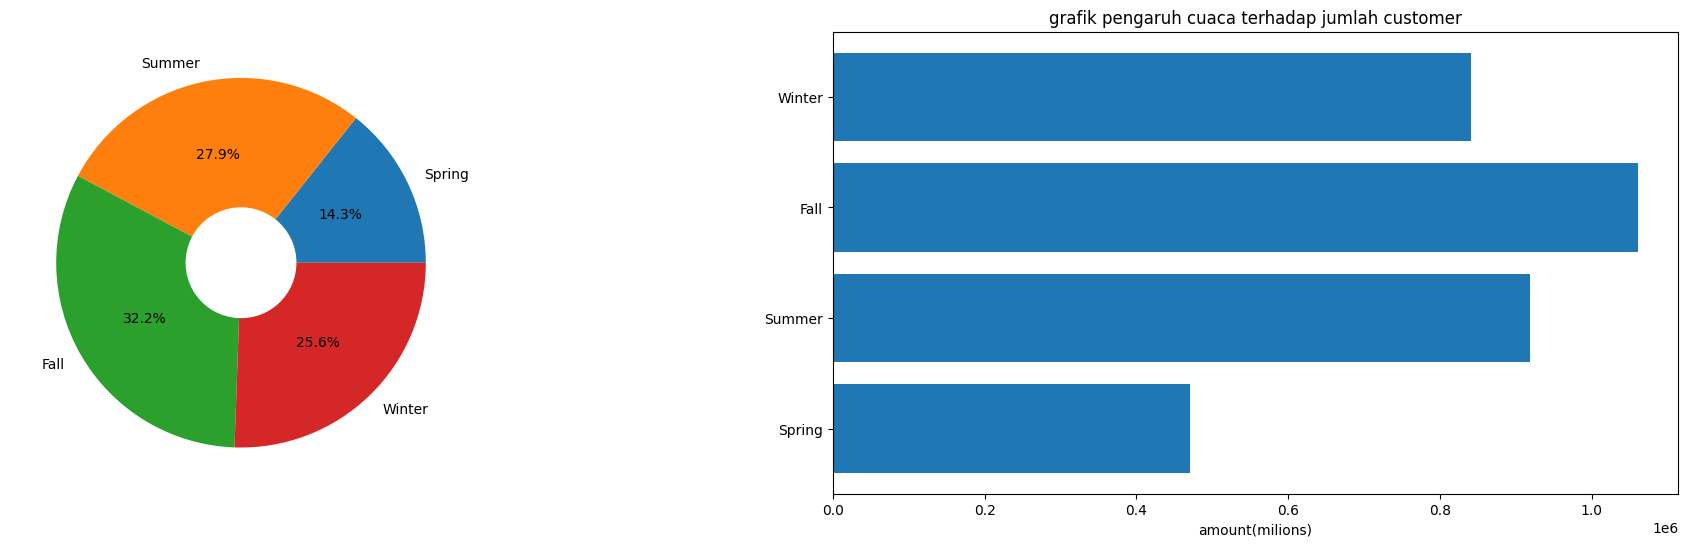

In [17]:
season_day= day_df.groupby(['season'],as_index=False).cnt.sum()
fig, axs =plt.subplots(1, 2, figsize=(24,6))

plt.title('grafik pengaruh cuaca terhadap jumlah customer')
axs[0].pie(x= season_day['cnt'], labels= season_day['season'], autopct='%1.1f%%', wedgeprops = {'width': 0.7},)
axs[1].barh(season_day['season'], season_day['cnt'])
axs[1].set_xlabel('amount(milions)')

season_day

### Pertanyaan 5: Grafik penjualan tiap harinya

<function matplotlib.pyplot.show(close=None, block=None)>

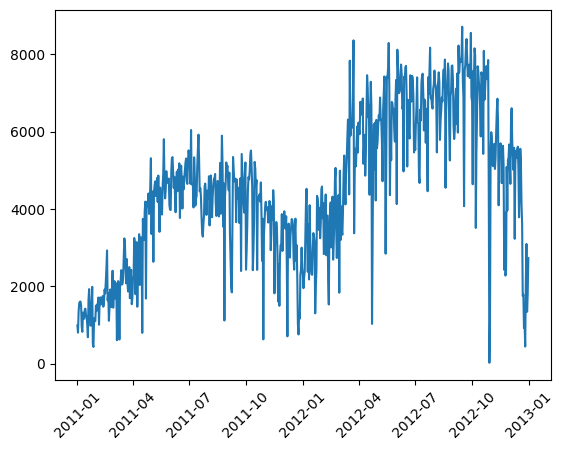

In [18]:
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xticks(rotation=45)
plt.legend
plt.show


In [19]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,work,saturday,0,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,work,sunday,0,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,work,monday,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,work,tuesday,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,work,wednesday,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,work,thursday,1,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,1,12,work,friday,1,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,1,12,work,saturday,0,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,1,12,work,sunday,0,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Conclusion

- Conclution pertanyaan 1 : pada hari kerja dapat dilihat customer pengguna sepeda lebih banyak dari pada ketika hari libur
- Conclution pertanyaan 2 : dapat dilihat jumlah customer di tiap harinya dalam satu minggu kurang lebih sama di kisaran 14% dengan rata rata pengguna terbanyak ada di hari jumat dan paling sedikit ada di hari sabtu
- Conclution pertanyaan 3 : 
            -pada musim gugur dan musim dingin kecepatan angin cenderung lebih pelan sedangkan pada     musim semi dan musim panas kecepatan angin lebih kencang
            -pada musim panas dan musim gugur temperatur akan jauh lebih hangat sedangkan pada musim semi dan musim dingin temperatur cenderung lebih tinggi
            -pada saat cuaca sedikit hujan kecepatan angin berada di titik paling kencang sedangkan pada saat cuaca berawan kecepatan angin berada pada titik paling rendah
- Conclution pertanyaan 4 : pada musim gugur jumlah customer penyewa sepeda berada di angka terbanyak,disusul dengan musim panas  kemudian musim dingin dan jumlah customer paling sedikit berada pada musim semi
- Conclution pertanyaan 5 : jumlah penjualan setiap hari dan bulannya selalu berfluktuatif tergantung dengan beberapa faktor yang telah di sebutkan sebelmunya